<a href="https://colab.research.google.com/github/lharnim/MINI-PROJECT-UPDATES/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.0+cu116
    Uninstalling torchaudio-0.13.0+cu116:
      Successfully uninstalled torchaudio-0.13.0+cu116
ERROR: pip's dependency resolver does no

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#im_1_path = './images/1_carplate.jpg'
im_2_path = '/content/sample_data/image.jpg'
im_3_path = '/content/sample_data/image2.jpg'
im_4_path = '/content/sample_data/image4.jpg'
im_5_path = '/content/image_har.png'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [17]:
result = recognize_text(im_5_path)

In [18]:
result

[([[7, 1], [357, 1], [357, 21], [7, 21]],
  'Software Engineering and Agile Methodologies',
  0.9941218706826279),
 ([[5, 57], [118, 57], [118, 88], [5, 88]], 'Contents', 0.9999924557023288),
 ([[31, 103], [81, 103], [81, 123], [31, 123]], 'Socio', 0.9999496199960319),
 ([[94, 102], [256, 102], [256, 126], [94, 126]],
  'Technical Systerns',
  0.7288086108084599),
 ([[33, 127], [57, 127], [57, 143], [33, 143]], '1.1', 0.9997699198483843),
 ([[71, 123], [208, 123], [208, 147], [71, 147]],
  'Complex Systems',
  0.9927210026298448),
 ([[31, 145], [57, 145], [57, 163], [31, 163]], '1.2', 0.8344982088927175),
 ([[70, 143], [230, 143], [230, 168], [70, 168]],
  'Systems Engineering',
  0.9492303281715766),
 ([[71, 167], [109, 167], [109, 183], [71, 183]], '1.2.1', 0.5964767340797271),
 ([[176, 165], [350, 165], [350, 190], [176, 190]],
  'of System Engineering',
  0.8959116675088687),
 ([[30, 200], [270, 200], [270, 224], [30, 224]],
  'Dependability and Security',
  0.977093071928057),
 ([

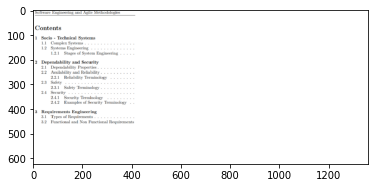

In [19]:
img_1 = cv2.imread(im_5_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: Software Engineering and Agile Methodologies (Probability: 0.99)
Detected text: Contents (Probability: 1.00)
Detected text: Socio (Probability: 1.00)
Detected text: Technical Systerns (Probability: 0.73)
Detected text: 1.1 (Probability: 1.00)
Detected text: Complex Systems (Probability: 0.99)
Detected text: 1.2 (Probability: 0.83)
Detected text: Systems Engineering (Probability: 0.95)
Detected text: 1.2.1 (Probability: 0.60)
Detected text: of System Engineering (Probability: 0.90)
Detected text: Dependability and Security (Probability: 0.98)
Detected text: 2.1 (Probability: 0.64)
Detected text: Dependability Properties (Probability: 0.86)
Detected text: 2.2 (Probability: 0.93)
Detected text: Availability anc Reliability (Probability: 0.77)
Detected text: 2.2.1 (Probability: 0.95)
Detected text: Reliability Termninology (Probability: 0.85)
Detected text: 2.3 (Probability: 0.55)
Detected text: Safety (Probability: 0.78)
Detected text: 2.3.1 (Probability: 0.71)
Detected tex

<Figure size 432x288 with 0 Axes>

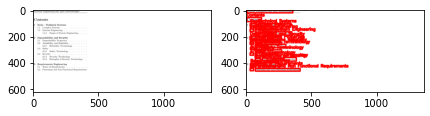

In [22]:
overlay_ocr_text(im_5_path, 'chapter')

In [21]:
result = recognize_text(im_5_path)

KeyboardInterrupt: ignored

In [ ]:
result

[([[235, 115], [501, 115], [501, 183], [235, 183]],
  'MAKE TEXT',
  0.9995702726576994),
 ([[165, 225], [565, 225], [565, 293], [165, 293]],
  'STAND OUT FROM',
  0.7502459281803265),
 ([[195, 335], [595, 335], [595, 403], [195, 403]],
  'BACKGROUNDS %',
  0.5066884255734012)]

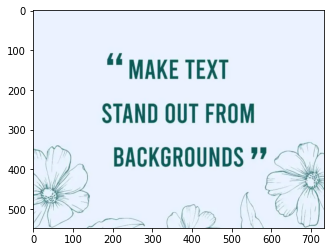

In [ ]:
img_1 = cv2.imread(im_2_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')


Detected text: MAKE TEXT (Probability: 1.00)
Detected text: STAND OUT FROM (Probability: 0.75)
Detected text: BACKGROUNDS % (Probability: 0.51)


FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

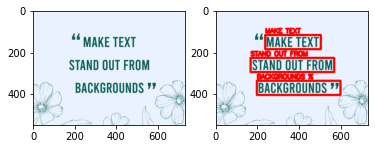

In [ ]:
overlay_ocr_text(im_2_path, 'image2')

In [23]:
!pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
result = recognize_text(im_5_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

Software Engineering and Agile Methodologies Contents Socio Technical Systerns 1.1 Complex Systems 1.2 Systems Engineering 1.2.1 of System Engineering Dependability and Security 2.1 Dependability Properties 2.2 Availability anc Reliability 2.2.1 Reliability Termninology 2.3 Safety 2.3.1 Safety Termninology 2.4 Security 241 Security Terminology 2.4.2 Examples of Security Terminology Requirements Engineering 3.1 Types of Requirements 3.2 Functional and Non Functional Requirements Stages 


In [25]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS(sentence)
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)